<a href="https://colab.research.google.com/github/CatTastic23/DataAnalyticsPortfolio/blob/main/Fam_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#Family MovieNights! - Catherine Nguyen

Introduction/Background information:
* I was fortunate as a child to be raised in a family that stook close to home. Being one out of 22 cousins, I was always surrounded by family, up until I turned 12. The first to leave California was my uncle's family, which consisted of 4 children. 

* Long story short, we cousins may be far apart, but our conection is still strong. To keep it that way, I created 'Family Movie Nights!'. Where we stream movies to watch when we are free. 

* As such, to keep track of all the movies we would like to watch. I created a google sheet to sort the movies we wanted to watch, what we have watched and everyones availability. 

* As for this notebook, I wanted to toy with the data we collected as I enjoy working with data and finding insights. 

    


Using this as a way to look at this info differently.


---
#Basic stuff Imports and looking at the data *uncleaned*
* Google sheet connection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

Below is the code we need to allow us access to google sheets so that I can easily analyze it. 
* ```auth``` - lets us authenticate our google account
* ```gc``` - is the variable that holds the url link to our google sheet **MovieNights!**


In [4]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [5]:
#wb hold our movienight sheet info.
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IYQ28v49WgMXv_jWNcmj97slGgAkX8RmPWgNCErAypE/edit#gid=0')
wb

<Spreadsheet 'MovieNights!' id:1IYQ28v49WgMXv_jWNcmj97slGgAkX8RmPWgNCErAypE>


##Setting up the dataframes now that Google sheets is connected

Specify which sheet we want to look at. There are three of them: 
* ```'Movies to Watch'```
* ```'Already Watched'```
* ```'Schedules'```

Use ```.worksheet(' ')``` to specify with specific sheet.



In [6]:
# Sheet1 will be Movies to Watch etc.
sheet1 = wb.worksheet('Movies to Watch')
sheet2 = wb.worksheet('Already Watched')
sheet3 = wb.worksheet('Schedules')

```.get_all_values()``` gets all the values from the specific sheets in a googlesheet and returns data as a matrix.

In [7]:
#gets all the data from those specific sheets and turns them into a matrix
data1 = sheet1.get_all_values()         # Movies to Watch
data2 = sheet2.get_all_values()         # Already Watched
data3 = sheet3.get_all_values()         # Schedules

In [8]:
# changes these matrix into a DataFrame
movies = pd.DataFrame(data1)            # Movies to Watch
seen = pd.DataFrame(data2)             # Already Watched
sched = pd.DataFrame(data3)             # Schedules

In [9]:
# Simply calling movies.head() would return all the data. col would be numbers. 
# we need to set the first row as the col names.
movies.columns = movies.iloc[0]
movies = movies.iloc[1:]

seen.columns = seen.iloc[0]
seen = seen.iloc[1:]

sched.columns = sched.iloc[0]
sched = sched.iloc[1:]


##Now to visualize the data

**Movies to Watch**

In [10]:
movies.head()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
1,Hocus Pocus,1993,PG,96,"Comedy, Family, Fantasy",Disney+,https://www.youtube.com/OFm_2RyxXjQ,TRUE,FALSE,FALSE,FALSE
2,Prisoners,2013,R,153,"Crime, Drama, Mystery",Hulu,https://youtu.be/bpXfcTF6iVk,FALSE,FALSE,FALSE,FALSE
3,Clue,1985,PG,96,"Comedy, Crime, Mystery",Amazon Prime,https://youtu.be/KEXdWfsKZ1k,TRUE,FALSE,FALSE,FALSE
4,Twitches,2005,TV-PG,86,"Comedy, Drama, Family",Disney+,https://youtu.be/RlPA1NxnWCg,TRUE,FALSE,FALSE,FALSE
5,Before I Fall,2017,PG-13,98,"Drama, Fantasy, Mystery",Netflix,https://youtu.be/q3Zyy4ZXegE,FALSE,FALSE,FALSE,FALSE


In [11]:
movies.shape

(965, 11)

**Already Watched**

In [12]:
seen.head()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
1,Hubie Halloween,2020,PG-13,102,"Comedy, Family, Fantasy",Netflix,Hubie,TRUE,FALSE,FALSE,TRUE
2,The Nightmare Before Christmas,1993,PG,78,"Family, Fantasy, Animation, Musical",Disney+,Night,TRUE,FALSE,FALSE,TRUE
3,Enola Holmes,2020,PG-13,123,"Adventure, Crime, Drama",Netflix,Enola,FALSE,FALSE,FALSE,TRUE
4,The Haunted Mansion,2003,PG,88,"Comedy, Family, Fantasy",Disney+,Mansion,TRUE,FALSE,FALSE,TRUE
5,Scooby-Doo on Zombie Island,1998,TV-G,77,"Animation, Adventure, Comedy",,Scoobz,TRUE,FALSE,FALSE,TRUE


In [13]:
seen.shape

(970, 11)

**Schedules**

In [14]:
sched

,Name,Sat,Sun,Mon,Tue,Wed,Thu,Fri
1,Linh,5pm+,5pm+,,,8pm+,5pm+,5pm+
2,Cece,,,,,2-5pm MST,3:30pmMST,12-5pm MST
3,Han,6pm+ MST,6pm+ MST,,6pm+ MST,,,6pm+ MST
4,Thicc Legend,,,,,x,,x
5,Monica,,,,,6pm+ MST,6pm+ MST,
6,Huong,x,2pm+ MST,,,,,7pm+ MST


In [15]:
sched.shape

(6, 8)

---
#Cleaning the Data: Need to drop NULLS
* Changing the datatypes
* Cleaning out the NANs


##Changing the empty data with NAN. and the booleans into 1s and 0s

Using the lambda function to change the empty data in the series into a NAN for both **movies** and **seen**. 

In [16]:
movies['Name'] = movies['Name'].apply(lambda x: np.nan if x == '' else x)
movies['Year'] = movies['Year'].apply(lambda x: np.nan if x == '' else x)
movies['Rating'] = movies['Rating'].apply(lambda x: np.nan if x == '' else x)
movies['mins'] = movies['mins'].apply(lambda x: np.nan if x == '' else x)
movies['Genre'] = movies['Genre'].apply(lambda x: np.nan if x == '' else x)
movies['Provider'] = movies['Provider'].apply(lambda x: np.nan if x == '' else x)
movies['Trailer'] = movies['Trailer'].apply(lambda x: np.nan if x == '' else x)
movies['Halloween'] = movies['Halloween'].apply(lambda x: 1 if x == 'TRUE' else 0)
movies['Thanksgiving'] = movies['Thanksgiving'].apply(lambda x: 1 if x == 'TRUE' else 0)
movies['Christmas'] = movies['Christmas'].apply(lambda x: 1 if x == 'TRUE' else 0)
movies['Seen'] = movies['Seen'].apply(lambda x: 1 if x == 'TRUE' else 0)

seen['Name'] = seen['Name'].apply(lambda x: np.nan if x == '' else x)
seen['Year'] = seen['Year'].apply(lambda x: np.nan if x == '' else x)
seen['Rating'] = seen['Rating'].apply(lambda x: np.nan if x == '' else x)
seen['mins'] = seen['mins'].apply(lambda x: np.nan if x == '' else x)
seen['Genre'] = seen['Genre'].apply(lambda x: np.nan if x == '' else x)
seen['Provider'] = seen['Provider'].apply(lambda x: np.nan if x == '' else x)
seen['Trailer'] = seen['Trailer'].apply(lambda x: np.nan if x == '' else x)
seen['Halloween'] = seen['Halloween'].apply(lambda x: 1 if x == 'TRUE' else 0)
seen['Thanksgiving'] = seen['Thanksgiving'].apply(lambda x: 1 if x == 'TRUE' else 0)
seen['Christmas'] = seen['Christmas'].apply(lambda x: 1 if x == 'TRUE' else 0)
seen['Seen'] = seen['Seen'].apply(lambda x: 1 if x == 'TRUE' else 0)

movies.tail()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [17]:
seen.tail()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0



##Dropping all the NANs
* ```.dropna()``` to drop the nans

In [18]:
movies=movies.dropna(subset=['Name'])#.sort_values(by='mins', ascending=False)
movies.tail()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
82,The Edge of Seventeen,2016,R,104,"Comedy, Drama",NaN,NaN,0,0,0,0
83,Fighting with my Family,2019,PG-13,108,"Biography, Comedy, Drama","Amazon Prime, Hulu",https://www.youtube.com/watch?v=I-X5WnMzOvA,0,0,0,0
84,Ernest & Celestine,2012,PG,80,"Animation, Adventure, Comedy",Amazon Prime,https://www.youtube.com/watch?v=PyU-mSUOnSs,0,0,0,0
85,The Red Turtle,2016,PG,80,"Animation, Family, Fantasy",NaN,NaN,0,0,0,0
86,Palm Springs,2020,R,90,"Comedy, Fantasy, Mystery",Hulu,https://www.youtube.com/watch?v=Qf4H06_mCZE&vl=en,0,0,0,0


In [19]:
seen = seen.dropna(subset=['Name'])#.sort_values(by='mins', ascending=False)
seen.shape

(21, 11)


##Changing the data types

Most of the dataframes do not have the correct data types. We need to fix that. Luckily we only need to fix movies and seen

In [20]:
movies.dtypes

0
Name            object
Year            object
Rating          object
mins            object
Genre           object
Provider        object
Trailer         object
Halloween        int64
Thanksgiving     int64
Christmas        int64
Seen             int64
dtype: object

Below will change all the data types and creates a new matrix. Then use those matrices to create a new updated DataFrame.

In [21]:
new_movies = {
'Name': movies['Name'],
'Year': movies['Year'].fillna(0).astype(int),
'Rating': movies['Rating'],
'mins': movies['mins'].fillna(0).astype(int),
'Genre': movies['Genre'],
'Provider': movies['Provider'],
'Trailer': movies['Trailer'],
'Halloween': movies['Halloween'].astype(bool),
'Thanksgiving': movies['Thanksgiving'].astype(bool),
'Christmas': movies['Christmas'].astype(bool),
'Seen': movies['Seen'].astype(bool)
}
new_seen = {
'Name': seen['Name'],
'Year': seen['Year'].fillna(0).astype(int),
'Rating': seen['Rating'],
'mins': seen['mins'].fillna(0).astype(int),
'Genre': seen['Genre'],
'Provider': seen['Provider'],
'Trailer': seen['Trailer'],
'Halloween': seen['Halloween'].astype(bool),
'Thanksgiving': seen['Thanksgiving'].astype(bool),
'Christmas': seen['Christmas'].astype(bool),
'Seen': seen['Seen'].astype(bool)
}

movies = pd.DataFrame(new_movies) 
seen = pd.DataFrame(new_seen)

movies.dtypes

Name            object
Year             int64
Rating          object
mins             int64
Genre           object
Provider        object
Trailer         object
Halloween         bool
Thanksgiving      bool
Christmas         bool
Seen              bool
dtype: object

In [22]:
movies.tail()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
82,The Edge of Seventeen,2016,R,104,"Comedy, Drama",NaN,NaN,False,False,False,False
83,Fighting with my Family,2019,PG-13,108,"Biography, Comedy, Drama","Amazon Prime, Hulu",https://www.youtube.com/watch?v=I-X5WnMzOvA,False,False,False,False
84,Ernest & Celestine,2012,PG,80,"Animation, Adventure, Comedy",Amazon Prime,https://www.youtube.com/watch?v=PyU-mSUOnSs,False,False,False,False
85,The Red Turtle,2016,PG,80,"Animation, Family, Fantasy",NaN,NaN,False,False,False,False
86,Palm Springs,2020,R,90,"Comedy, Fantasy, Mystery",Hulu,https://www.youtube.com/watch?v=Qf4H06_mCZE&vl=en,False,False,False,False


In [23]:
seen.head()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
1,Hubie Halloween,2020,PG-13,102,"Comedy, Family, Fantasy",Netflix,Hubie,True,False,False,True
2,The Nightmare Before Christmas,1993,PG,78,"Family, Fantasy, Animation, Musical",Disney+,Night,True,False,False,True
3,Enola Holmes,2020,PG-13,123,"Adventure, Crime, Drama",Netflix,Enola,False,False,False,True
4,The Haunted Mansion,2003,PG,88,"Comedy, Family, Fantasy",Disney+,Mansion,True,False,False,True
5,Scooby-Doo on Zombie Island,1998,TV-G,77,"Animation, Adventure, Comedy",NaN,Scoobz,True,False,False,True


---
#View Lists in multiple different sorted ways. 
* ```yes_p``` = Movies to watch with Providers
* ```yes_net``` = Movies to watch Provided by Netflix
* ```yes_hulu``` = Movies to watch Provided by Hulu
* ```yes_dis``` = Movies to watch Provided by Disney+
* ```yes_other``` = Movies to watch Provided by Others
* ```no_p``` = Movies to watch with No Provider
* ```sort_min_seen``` = Movies Seen sorted by mins
* ```hallow_prov```= Halloween Movies to watch with Provider
* ```hallow_no_prov``` = Halloween Movies to watch with No Provider
* ```thanks_prov```= Thanksgiving Movies to watch with Provider
* ```thanks_no_prov``` = Thanksgiving Movies to watch with No Provider
* ```cmas_prov```= Christmas Movies to watch with Provider
* ```cmas_no_prov``` = Christmas Movies to watch with No Provider
* ```themeless``` = Movies with No Theme
* ```themeless_prov``` = Movies with No Theme and has Providers
* ```year``` = Movies sorted by years

##List of Movies to watch with Providers and no Providers sorted by min and by providers.


###Movies to watch with Providers

In [24]:
yes_p = movies[(movies.Provider.isnull()==False)].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
yes_p

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Prisoners,2013,R,153,"Crime, Drama, Mystery",Hulu,https://youtu.be/bpXfcTF6iVk,False,False,False,False
1,Burning,2018,Unrated,148,"Drama, Mystery",Netflix,https://www.youtube.com/watch?v=wi6Kw7V8gXk,False,False,False,False
2,A Silent Voice: The Movie,2016,Unrated,130,"Animation, Drama, Family",Netflix,https://www.youtube.com/watch?v=E7utbHbxDAM,False,False,False,False
3,The Trial of the Chicago 7,2020,R,129,"Drama, History, Thriller",Netflix,https://www.youtube.com/watch?v=FtiK_l0dgqE,False,False,False,False
4,Spotlight,2015,R,129,"Biography, Crime, Drama",Netflix,https://youtu.be/EwdCIpbTN5g,False,False,False,False
5,Snowpeircer,2013,R,126,"Action, Drama, Sci-Fi",Netflix,https://youtu.be/nX5PwfEMBM0,False,False,False,False
6,Shaun the Sheep Movie,2015,PG,125,"Animation, Adventure, Comedy",IMDBTV,https://www.youtube.com/watch?v=W5scDjNIxk0,False,False,False,False
7,Twilight Series,2008,PG-13,122,"Drama, Fantasy, Romance",Hulu,https://youtu.be/uxjNDE2fMjI,True,False,False,False
8,Clouds,2020,PG-13,121,"Drama, Music",Disney+,https://www.youtube.com/watch?v=_KwQFSMWDKU,False,False,False,False
9,Paterson,2016,R,118,"Comedy. Drama, Romance",Amazon Prime,https://www.youtube.com/watch?v=Yqiq36VYCqc,False,False,False,False


###Netflix Provided Movies

In [25]:
yes_net = movies[(movies.Provider=='Netflix')].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
yes_net

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Burning,2018,Unrated,148,"Drama, Mystery",Netflix,https://www.youtube.com/watch?v=wi6Kw7V8gXk,False,False,False,False
1,A Silent Voice: The Movie,2016,Unrated,130,"Animation, Drama, Family",Netflix,https://www.youtube.com/watch?v=E7utbHbxDAM,False,False,False,False
2,Spotlight,2015,R,129,"Biography, Crime, Drama",Netflix,https://youtu.be/EwdCIpbTN5g,False,False,False,False
3,The Trial of the Chicago 7,2020,R,129,"Drama, History, Thriller",Netflix,https://www.youtube.com/watch?v=FtiK_l0dgqE,False,False,False,False
4,Snowpeircer,2013,R,126,"Action, Drama, Sci-Fi",Netflix,https://youtu.be/nX5PwfEMBM0,False,False,False,False
5,The silence of the lamb,1991,R,118,"Crime, Drama, Thriller",Netflix,https://youtu.be/W6Mm8Sbe__o,False,False,False,False
6,Nightcrawler,2014,R,117,"Crime, Drama, Thriller",Netflix,https://youtu.be/u1uP_8VJkDQ,False,False,False,False
7,Back to the future,1985,PG,116,"Adventure, Comedy, Sci-Fi",Netflix,https://youtu.be/qvsgGtivCgs,False,False,False,False
8,The Little Prince,2015,PG,108,"Animation, Adventure, Drama",Netflix,https://www.youtube.com/watch?v=9gARHWfXE40,False,False,False,False
9,The Death of Stalin,2017,R,107,"Comedy. Drama, History",Netflix,https://www.youtube.com/watch?v=E9eAshaPvYw,False,False,False,False


###Hulu Provided Movies

In [26]:
yes_hulu = movies[(movies.Provider=='Hulu')].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
yes_hulu

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Prisoners,2013,R,153,"Crime, Drama, Mystery",Hulu,https://youtu.be/bpXfcTF6iVk,False,False,False,False
1,Twilight Series,2008,PG-13,122,"Drama, Fantasy, Romance",Hulu,https://youtu.be/uxjNDE2fMjI,True,False,False,False
2,Gemini Man,2019,PG-13,107,"Action, Drama, Sci-Fi",Hulu,https://www.youtube.com/watch?v=6orc_lHvJKY,False,False,False,False
3,Free Birds,2013,PG,91,"Animation, Adventure, Comedy",Hulu,https://www.youtube.com/watch?v=WyXckSVvKwo,False,True,False,False
4,Palm Springs,2020,R,90,"Comedy, Fantasy, Mystery",Hulu,https://www.youtube.com/watch?v=Qf4H06_mCZE&vl=en,False,False,False,False
5,Chicken Run,2000,PG,84,"Animation, Comedy, Family",Hulu,https://www.youtube.com/watch?v=Jr8mqq9NVxc,False,True,False,False


###Disney+ Provided Movies

In [27]:
yes_dis = movies[(movies.Provider=='Disney+')].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
yes_dis

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Clouds,2020,PG-13,121,"Drama, Music",Disney+,https://www.youtube.com/watch?v=_KwQFSMWDKU,False,False,False,False
1,Togo,2019,PG,113,"Adventure, Biography, Drama",Disney+,https://youtu.be/HMfyueM-ZBQ,False,False,False,False
2,Christopher Robin,2018,PG,104,"Comedy, Drama, Family",Disney+,https://www.youtube.com/watch?v=T-wpaNZIDCo,False,False,False,False
3,Timmy Failure: Mistakes Were Made,2020,PG,99,"Adventure, Comedy, Drama",Disney+,https://www.youtube.com/watch?v=LINyvJe2NdA&vl=en,False,False,False,False
4,Hocus Pocus,1993,PG,96,"Comedy, Family, Fantasy",Disney+,https://www.youtube.com/OFm_2RyxXjQ,True,False,False,False
5,Twitches,2005,TV-PG,86,"Comedy, Drama, Family",Disney+,https://youtu.be/RlPA1NxnWCg,True,False,False,False
6,The Adventures of Ichabod and Mr. Toad,1949,Approved,68,"Animation, Comedy, Family",Disney+,https://www.youtube.com/watch?v=cjeG0hId7Ms,False,False,False,False
7,Fantastic Four,0,NaN,0,NaN,Disney+,NaN,False,False,False,False


###Other Provided Movies 

In [28]:
yes_other = movies[(movies.Provider.isnull()==False) & (movies.Provider!='Netflix') & (movies.Provider!='Hulu') & (movies.Provider!='Disney+')].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
yes_other

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Shaun the Sheep Movie,2015,PG,125,"Animation, Adventure, Comedy",IMDBTV,https://www.youtube.com/watch?v=W5scDjNIxk0,False,False,False,False
1,Paterson,2016,R,118,"Comedy. Drama, Romance",Amazon Prime,https://www.youtube.com/watch?v=Yqiq36VYCqc,False,False,False,False
2,Fighting with my Family,2019,PG-13,108,"Biography, Comedy, Drama","Amazon Prime, Hulu",https://www.youtube.com/watch?v=I-X5WnMzOvA,False,False,False,False
3,isle of dogs,2018,PG-13,101,"Animation, Adventure, Comedy",IMDBTV,https://www.youtube.com/watch?v=avteeoh9LzY,False,False,False,False
4,The Farewell,2019,PG,100,"Comedy, Drama",Amazon Prime,https://youtu.be/RofpAjqwMa8,False,False,False,False
5,Clue,1985,PG,96,"Comedy, Crime, Mystery",Amazon Prime,https://youtu.be/KEXdWfsKZ1k,True,False,False,False
6,Love & Friendship,2016,PG,90,"Comedy, Drama, Romance",Amazon Prime,https://www.youtube.com/watch?v=wrKRrnNif90,False,False,False,False
7,The Squid and the Whale,2005,R,81,"Comedy, Drama",Amazon Prime,https://www.youtube.com/watch?v=JRkK5n2mkvg,False,False,False,False
8,Ernest & Celestine,2012,PG,80,"Animation, Adventure, Comedy",Amazon Prime,https://www.youtube.com/watch?v=PyU-mSUOnSs,False,False,False,False
9,WAP MV,2020,R,4,Musical,Youtube,https://youtu.be/hsm4poTWjMs,False,False,False,False


###No Providing Movies

In [29]:
no_p = movies[(movies.Provider.isnull()==True)].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
no_p

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Blade Runner 2049,2017,R,164,"Action, Drama, Mystery",NaN,NaN,False,False,False,False
1,Once upon time in Hollywood,2019,R,161,"Comedy, Drama",NaN,https://youtu.be/ELeMaP8EPAA,False,False,False,False
2,It,2017,R,135,Horror,NaN,https://youtu.be/FnCdOQsX5kc,True,False,False,False
3,Dreamgirls,2006,PG-13,130,"Drama, Music, Musical",NaN,https://www.youtube.com/watch?v=yK4AEkzYDIE,False,False,False,False
4,The Kid who would be King,2019,PG,120,"Action, Adventure, Family",NaN,NaN,False,False,False,False
5,Birdman or (The Unexpected Virtue of Ignorance),2014,R,119,"Comedy, Drama",NaN,NaN,False,False,False,False
6,Us,2019,R,116,"Horror, Mystery, Thriller",NaN,https://youtu.be/hNCmb-4oXJA,False,False,False,False
7,Arrival,2016,PG-13,116,"Drama, Mystery, Sci-Fi",NaN,NaN,False,False,False,False
8,Annihilation,2018,R,115,"Adventure, Drama, Horror",NaN,NaN,False,False,False,False
9,"Three Billboards outside Ebbing, Missouri",2017,R,115,"Comedy, Crime, Drama",NaN,NaN,False,False,False,False


##List of Movies Seen sorted by mins.

In [30]:
sort_mins_seen = seen.sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
sort_mins_seen

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Little Women,2019,PG,135,Drama,NaN,LITTLE,False,False,False,True
1,Call me by your Name,2017,R,132,"Drama, Romance",NaN,CALL,False,False,False,True
2,Knives Out,2019,PG-13,130,"Comedy, Crime, Drama",Amazon Prime,Knives out,True,False,False,True
3,Her,2013,R,126,"Drama, Romance, Sci-Fi",Netflix,Her,False,False,False,True
4,Enola Holmes,2020,PG-13,123,"Adventure, Crime, Drama",Netflix,Enola,False,False,False,True
5,Joker,2019,R,122,"Crime, Drama, Thriller",NaN,Joker,False,False,False,True
6,Rebecca,2020,PG-13,121,"Drama, Mystery, Romance",Netflix,Rebecca,False,False,False,True
7,The Nice Guys,2016,R,116,"Action, Comedy, Crime",NaN,https://www.youtube.com/watch?v=z-_HQ0bUzS8,False,False,False,True
8,The Muppets,2011,PG,103,"Adventure, Comedy, Family","Disney+, Netflix",The Muppets,False,False,False,True
9,Onward,2020,PG,102,"Animation, Adventure, Comedy",Disney+,https://www.youtube.com/watch?v=HxKXiQvyG_o,False,False,False,True


##List of Halloween themed, w/Providers and w/o Providerx, and have not been seen Movies.

In [31]:
hallow_prov = movies[(movies.Halloween==True) & (movies.Seen==False) & (movies.Provider.isnull()==False)].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
hallow_no_prov = movies[(movies.Halloween==True) & (movies.Seen==False) & (movies.Provider.isnull()==True)].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)

In [32]:
hallow_prov

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Twilight Series,2008,PG-13,122,"Drama, Fantasy, Romance",Hulu,https://youtu.be/uxjNDE2fMjI,True,False,False,False
1,The Addams Family,1991,PG-13,99,"Comedy, Fantasy",Netflix,https://youtu.be/G388UMkJIBE,True,False,False,False
2,Hocus Pocus,1993,PG,96,"Comedy, Family, Fantasy",Disney+,https://www.youtube.com/OFm_2RyxXjQ,True,False,False,False
3,Clue,1985,PG,96,"Comedy, Crime, Mystery",Amazon Prime,https://youtu.be/KEXdWfsKZ1k,True,False,False,False
4,Twitches,2005,TV-PG,86,"Comedy, Drama, Family",Disney+,https://youtu.be/RlPA1NxnWCg,True,False,False,False
5,The Witches,2020,PG,0,"Adventure, Comedy, Family",HBOmax,https://www.youtube.com/watch?v=5qEi_mow21I,True,False,False,False


In [33]:
hallow_no_prov

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,It,2017,R,135,Horror,NaN,https://youtu.be/FnCdOQsX5kc,True,False,False,False
1,Edward Scissor,1990,PG-13,105,"Drama, Fantasy, Romance",NaN,https://youtu.be/TBHIO60whNw,True,False,True,False
2,Coraline,2009,PG,100,"Animation, Drama, Family",NaN,https://youtu.be/m9bOpeuvNwY,True,False,False,False
3,Paranorman,2012,PG,92,"Animation, Adventure, Comedy",NaN,https://youtu.be/hgwSpajMw3s,True,False,False,False
4,Hotel Transalvania,2012,PG,91,"Animation, Comedy, Family",NaN,https://youtu.be/FYgzizpCTKU,True,False,False,False
5,Corpse Bride,2005,PG,77,"Animation, Drama, Family",NaN,https://youtu.be/AGACeWVdFqo,True,False,False,False


##List of Thanksgiving themed, w/Providers and w/o Providers, and have not seen Movies

In [34]:
thanks_prov = movies[(movies.Thanksgiving==True) & (movies.Seen==False) & (movies.Provider.isnull()==False)].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
thanks_no_prov = movies[(movies.Thanksgiving==True) & (movies.Seen==False) & (movies.Provider.isnull()==True)].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
thanks_prov

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Free Birds,2013,PG,91,"Animation, Adventure, Comedy",Hulu,https://www.youtube.com/watch?v=WyXckSVvKwo,False,True,False,False
1,Chicken Run,2000,PG,84,"Animation, Comedy, Family",Hulu,https://www.youtube.com/watch?v=Jr8mqq9NVxc,False,True,False,False


In [35]:
thanks_no_prov

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,A Charlie Browns Thanksgiving,1973,TV-G,25,"Animation, Short, Comedy",NaN,https://www.youtube.com/watch?v=T322xZm4wwQ,False,True,False,False


##List of Christmas themed Movies, w/Providers and w/o Providers, and have not seen Movies  

In [36]:
cmas_prov = movies[(movies.Christmas==True) & (movies.Seen==False) & (movies.Provider.isnull()==False)].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
cmas_no_prov = movies[(movies.Christmas==True) & (movies.Seen==False) & (movies.Provider.isnull()==True)].sort_values(by='mins', ascending=False).reset_index().drop('index', axis=1)
cmas_prov

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,How the Grinch Stole Christmas,2000,PG,104,"Comedy, Family, Fantasy",Netflix,https://www.youtube.com/watch?v=DD0m9t4WHEQ,False,False,True,False
1,Klaus,2019,PG,96,"Animation, Adventure, Comedy",Netflix,https://youtu.be/taE3PwurhYM,False,False,True,False


In [37]:
cmas_no_prov

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Edward Scissor,1990,PG-13,105,"Drama, Fantasy, Romance",NaN,https://youtu.be/TBHIO60whNw,True,False,True,False
1,Arthur Christmas,2011,PG,97,"Animation, Adventure, Comedy",NaN,https://www.youtube.com/watch?v=vxcz1XIKUmo,False,False,True,False
2,Winnie the Pooh: Seasons of giving,1999,G,70,"Animation, Adventure, Family",NaN,https://www.youtube.com/watch?v=z9CvZau1tdI,False,False,True,False


##List of movies that don't Fit any theme AND has Providers 

In [38]:
themeless=movies[(movies.Halloween==False)&(movies.Thanksgiving==False)&(movies.Christmas==False)].sort_values(by='mins',ascending=False).reset_index().drop('index', axis=1)
themeless.head()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Blade Runner 2049,2017,R,164,"Action, Drama, Mystery",NaN,NaN,False,False,False,False
1,Once upon time in Hollywood,2019,R,161,"Comedy, Drama",NaN,https://youtu.be/ELeMaP8EPAA,False,False,False,False
2,Prisoners,2013,R,153,"Crime, Drama, Mystery",Hulu,https://youtu.be/bpXfcTF6iVk,False,False,False,False
3,Burning,2018,Unrated,148,"Drama, Mystery",Netflix,https://www.youtube.com/watch?v=wi6Kw7V8gXk,False,False,False,False
4,A Silent Voice: The Movie,2016,Unrated,130,"Animation, Drama, Family",Netflix,https://www.youtube.com/watch?v=E7utbHbxDAM,False,False,False,False


In [39]:
themeless_prov=movies[(movies.Halloween==False)&(movies.Thanksgiving==False)&(movies.Christmas==False)&(movies.Provider.isnull()==False)].sort_values(by='mins',ascending=False).reset_index().drop('index', axis=1)
themeless_prov.head()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Prisoners,2013,R,153,"Crime, Drama, Mystery",Hulu,https://youtu.be/bpXfcTF6iVk,False,False,False,False
1,Burning,2018,Unrated,148,"Drama, Mystery",Netflix,https://www.youtube.com/watch?v=wi6Kw7V8gXk,False,False,False,False
2,A Silent Voice: The Movie,2016,Unrated,130,"Animation, Drama, Family",Netflix,https://www.youtube.com/watch?v=E7utbHbxDAM,False,False,False,False
3,Spotlight,2015,R,129,"Biography, Crime, Drama",Netflix,https://youtu.be/EwdCIpbTN5g,False,False,False,False
4,The Trial of the Chicago 7,2020,R,129,"Drama, History, Thriller",Netflix,https://www.youtube.com/watch?v=FtiK_l0dgqE,False,False,False,False


##By year

In [40]:
year=movies.sort_values(by='Year', ascending=False).reset_index().drop('index', axis=1)
year.head()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Palm Springs,2020,R,90,"Comedy, Fantasy, Mystery",Hulu,https://www.youtube.com/watch?v=Qf4H06_mCZE&vl=en,False,False,False,False
1,Timmy Failure: Mistakes Were Made,2020,PG,99,"Adventure, Comedy, Drama",Disney+,https://www.youtube.com/watch?v=LINyvJe2NdA&vl=en,False,False,False,False
2,Alone/#Alive,2020,R,98,"Action, Drama, Horror",Netflix,https://www.youtube.com/watch?v=jQ8CCg1tOqc,False,False,False,False
3,Love and Monsters,2020,PG-13,109,"Adventure, Comedy",NaN,https://www.youtube.com/watch?v=yu8tBeNsVPc&vl=en,False,False,False,False
4,The Witches,2020,PG,0,"Adventure, Comedy, Family",HBOmax,https://www.youtube.com/watch?v=5qEi_mow21I,True,False,False,False


---
#Let get some numbers out of this.
* ```totalmins_all_movies()``` = returns total movies/mins/days spent has we watched all the movies 
* ```actual_hrs_spent()``` = returns total movies/mins/days we actually spent watching movies
* ```actual_hrs_left()``` = returns total movies/mins/days we need to spend to watch the remaining movies on our watch list. 

##The total amount of time spent had we watched all the movies on the list. 

In [41]:
def totalmins_all_movies():
  total = 0
  count = 0
  for min in movies.mins:
    total+=min
    count+=1
  for min in seen.mins:
    total+=min
    count+=1
  hour = total//60
  hours = total / 60
  mins = total % 60
  print("Total movies: " + str(count))
  print("Total time to watch: "+str(hour) +' hours and ' + str(mins) + ' mins.')
  print("Days estimate: " + str(hours/24))

totalmins_all_movies()

Total movies: 107
Total time to watch: 178 hours and 17 mins.
Days estimate: 7.428472222222222


##Total hours actually spent:

In [42]:
def actual_hrs_spent():  
  t=0
  count=0
  for m in seen.mins:
    t+=m
    count+=1
  h = t//60
  ho = t / 60
  m = t % 60
  print("Total Movies Seen: " + str(count))
  print("Total time spent watching: "+str(h) +' hours and ' + str(m) + ' mins.')
  print("Days estimate: " + str(ho/24))

actual_hrs_spent()

Total Movies Seen: 21
Total time spent watching: 36 hours and 11 mins.
Days estimate: 1.5076388888888888


##Total hours Left to spend from our Movies to Watch list

In [43]:
def actual_hrs_left():  
  t=0
  count=0
  for m in movies.mins:
      t+=m
      count+=1
  h = t//60
  ho = t / 60
  m = t % 60
  print("Total Movies Left to watch: " + str(count))
  print("Total time needed to watch movies on our watch list: "+str(h) +' hours and ' + str(m) + ' mins.')
  print("Days estimate: " + str(ho/24))

actual_hrs_left()

Total Movies Left to watch: 86
Total time needed to watch movies on our watch list: 142 hours and 6 mins.
Days estimate: 5.920833333333333


# Using the Seen Dataframe to chart Minutes spent per Provider

In [46]:
seen.head()

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
1,Hubie Halloween,2020,PG-13,102,"Comedy, Family, Fantasy",Netflix,Hubie,True,False,False,True
2,The Nightmare Before Christmas,1993,PG,78,"Family, Fantasy, Animation, Musical",Disney+,Night,True,False,False,True
3,Enola Holmes,2020,PG-13,123,"Adventure, Crime, Drama",Netflix,Enola,False,False,False,True
4,The Haunted Mansion,2003,PG,88,"Comedy, Family, Fantasy",Disney+,Mansion,True,False,False,True
5,Scooby-Doo on Zombie Island,1998,TV-G,77,"Animation, Adventure, Comedy",NaN,Scoobz,True,False,False,True


In [84]:
# Created a function to make it easier to get the sum for out new summarized dataframe
def sum_seen(sheet, provider_name):
  temp_sum = sheet.loc[sheet['Provider'] == provider_name, 'mins'].sum()
  return temp_sum

In [124]:
# Creating a new dataframe with the names of providers and the mins spent towards them.
# First we'll create two series. 
p = [x for x in seen.Provider.unique()]
l = [sum_seen(seen,x) for x in prov]

print('Providers: ' + str(p) + '\nTotal Mins Spent: ' + str(l)) 

Providers: ['Netflix', 'Disney+', nan, 'Amazon Prime', 'Hulu', 'Disney+, Netflix']
Total Mins Spent: [646, 534, 0, 130, 176, 103]


In [125]:
seen_data = {
    'Provider' : p,
    'Minutes' : l
}
sd = pd.DataFrame(seen_data)
new_sd = {
    'Provider' : sd['Provider'].astype(str),
    'Minutes' : sd['Minutes'].astype(int)
}
ssd = pd.DataFrame(new_sd)
ssd

,Provider,Minutes
0,Netflix,646
1,Disney+,534
2,nan,0
3,Amazon Prime,130
4,Hulu,176
5,"Disney+, Netflix",103


Now its time to visualize the time spent categorically. 

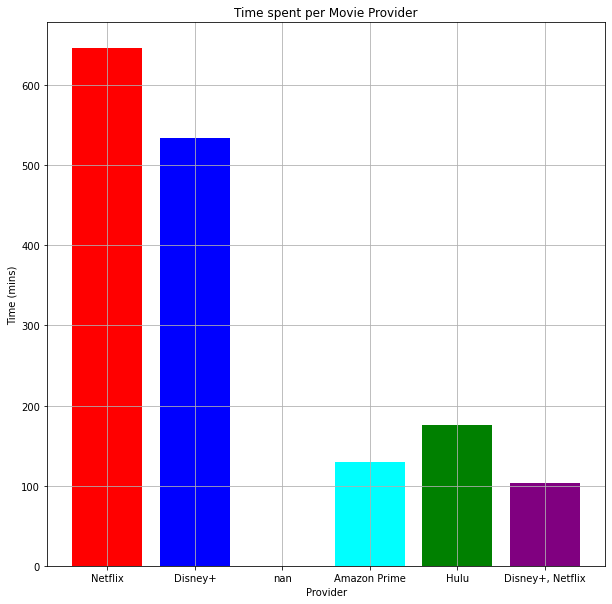

In [135]:
# Using a bar chart because we are comparing categories
plt.figure(1, figsize=(10,10)) 
plt.bar(x = ssd['Provider'], height = ssd['Minutes'], color = ['red', 'blue', 'black', 'cyan', 'green', 'purple'])
plt.title('Time spent per Movie Provider')
plt.xlabel('Provider')
plt.ylabel('Time (mins)')
plt.grid(True)

plt.show()

Based on the graph above. We can tell that we spend a majority of our time dedicated to Netflix and Disney +. This makes sense because we predominately watch family genre because we have kids who attend the stream. Which explains the time spent on disney plus. As for netflix, I believe this has to deal with marketing and family exposure to providers. We as a family have been users of netflix since Blockbusters existed. So we as a family are more familiar with its platform. Amazon prime, however, in my opinion, caters to adults. Hulu only two families including myself have subscriptions with hulu. So my other cousins are not aware of what movies Hulu has to provide. Perhaps with more time, I can dissect this a bit futher and find out the proportion of family movies each provider has and compare them. 

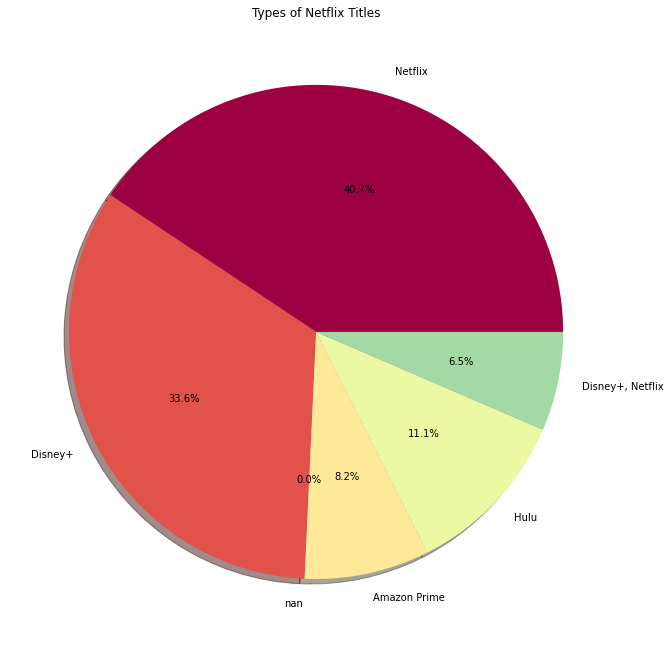

In [139]:
#Another chart that is good with categorical data are pir charts. Below you can see the percentages. 
plt.figure(1, figsize=(25,25)) 
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Types of Netflix Titles')
type_show_ids = plt.pie(sd['Minutes'], labels=sd['Provider'], autopct='%1.1f%%', shadow=True, colors=colors)

plt.show()

As you can see. Netflix and Disney+ dominate our time. We spent nearly 40.7+33.6+6.5 = 80.8% of our time focused on theme platforms compared to the rest. This just goes to show that netflix and disney plus are winning when it comes to branding and marketing. I would be interesting to create a survey to find out what subscriptions people have. Another contender is HBO max which has not been added. 

In [141]:
40.7+33.6+6.5

80.80000000000001

---
#Random Movie Selector
### * ```RNG_movies(n=name of dataframe, int x)``` = return 5 randomly selected movies from dataframes
* ```yes_p``` = Movies to watch with Providers
* ```yes_net``` = Movies to watch Provided by Netflix
* ```yes_hulu``` = Movies to watch Provided by Hulu
* ```yes_dis``` = Movies to watch Provided by Disney+
* ```yes_other``` = Movies to watch Provided by Others
* ```no_p``` = Movies to watch with No Provider
* ```sort_min_seen``` = Movies Seen sorted by mins
* ```hallow_prov```= Halloween Movies to watch with Provider
* ```hallow_no_prov``` = Halloween Movies to watch with No Provider
* ```thanks_prov```= Thanksgiving Movies to watch with Provider
* ```thanks_no_prov``` = Thanksgiving Movies to watch with No Provider
* ```cmas_prov```= Christmas Movies to watch with Provider
* ```cmas_no_prov``` = Christmas Movies to watch with No Provider
* ```themeless``` = Movies with No Theme
* ```themeless_prov``` = Movies with No Theme and has Providers
* ```year``` = Movies sorted by years

In [44]:
def RNG_movies(n, x):
  rng= n.sample(x).reset_index().drop('index', axis=1)
  return rng

In [45]:
RNG_movies(themeless_prov, 10)

,Name,Year,Rating,mins,Genre,Provider,Trailer,Halloween,Thanksgiving,Christmas,Seen
0,Nightcrawler,2014,R,117,"Crime, Drama, Thriller",Netflix,https://youtu.be/u1uP_8VJkDQ,False,False,False,False
1,Ernest & Celestine,2012,PG,80,"Animation, Adventure, Comedy",Amazon Prime,https://www.youtube.com/watch?v=PyU-mSUOnSs,False,False,False,False
2,Spotlight,2015,R,129,"Biography, Crime, Drama",Netflix,https://youtu.be/EwdCIpbTN5g,False,False,False,False
3,Hunt for Wilderpeople,2016,PG-13,101,"Adventure, Comedy, Drama",Netflix,https://www.youtube.com/watch?v=XGj3AogT9EM,False,False,False,False
4,Palm Springs,2020,R,90,"Comedy, Fantasy, Mystery",Hulu,https://www.youtube.com/watch?v=Qf4H06_mCZE&vl=en,False,False,False,False
5,Drive,2011,R,100,"Crime, Drama",Netflix,https://youtu.be/KBiOF3y1W0Y,False,False,False,False
6,Song of the Sea,2014,PG,93,"Animation, Adventure, Drama",Netflix,https://www.youtube.com/watch?v=VrhoOzW8oF8,False,False,False,False
7,Snowpeircer,2013,R,126,"Action, Drama, Sci-Fi",Netflix,https://youtu.be/nX5PwfEMBM0,False,False,False,False
8,Lady Bird,2017,R,94,"Comedy, Drama",Netflix,https://www.youtube.com/watch/cNi_HC839Wo,False,False,False,False
9,The Adventures of Ichabod and Mr. Toad,1949,Approved,68,"Animation, Comedy, Family",Disney+,https://www.youtube.com/watch?v=cjeG0hId7Ms,False,False,False,False


#Testing ?
* Tips for improvements implements APIs for trailer URL, Imdb for movie data. 